In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

# importing the necessary libraries

import seaborn as sns
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv")
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [7]:
df = df.set_index(df["Date"])
df.head()

,Date,Temp
Date,,
1981-01-01,1981-01-01,20.7
1981-01-02,1981-01-02,17.9
1981-01-03,1981-01-03,18.8
1981-01-04,1981-01-04,14.6
1981-01-05,1981-01-05,15.8


In [8]:
df.drop(["Date"], inplace=True, axis=1)
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [9]:
d = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}

In [10]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.weekday.map(d)

In [11]:
df.head()

,Temp,year,month,day,weekday
Date,,,,,
1981-01-01,20.7,1981,1,1,Wednesday
1981-01-02,17.9,1981,1,2,Thursday
1981-01-03,18.8,1981,1,3,Friday
1981-01-04,14.6,1981,1,4,Saturday
1981-01-05,15.8,1981,1,5,Sunday


In [12]:
df.tail()

,Temp,year,month,day,weekday
Date,,,,,
1990-12-27,14.0,1990,12,27,Wednesday
1990-12-28,13.6,1990,12,28,Thursday
1990-12-29,13.5,1990,12,29,Friday
1990-12-30,15.7,1990,12,30,Saturday
1990-12-31,13.0,1990,12,31,Sunday


In [13]:
df_temp = df[df.year < 1983]
df_temp.head()

,Temp,year,month,day,weekday
Date,,,,,
1981-01-01,20.7,1981,1,1,Wednesday
1981-01-02,17.9,1981,1,2,Thursday
1981-01-03,18.8,1981,1,3,Friday
1981-01-04,14.6,1981,1,4,Saturday
1981-01-05,15.8,1981,1,5,Sunday


In [14]:
df_temp.tail()

,Temp,year,month,day,weekday
Date,,,,,
1982-12-27,15.3,1982,12,27,Sunday
1982-12-28,16.3,1982,12,28,Monday
1982-12-29,15.8,1982,12,29,Tuesday
1982-12-30,17.7,1982,12,30,Wednesday
1982-12-31,16.3,1982,12,31,Thursday


In [15]:
df_temp = df_temp[["Temp"]]

In [16]:
df_temp.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [17]:
df_temp.describe()

,Temp
count,730.000000
mean,11.150411
std,4.589728
min,0.000000
25%,7.800000
50%,11.000000
75%,14.200000
max,26.300000


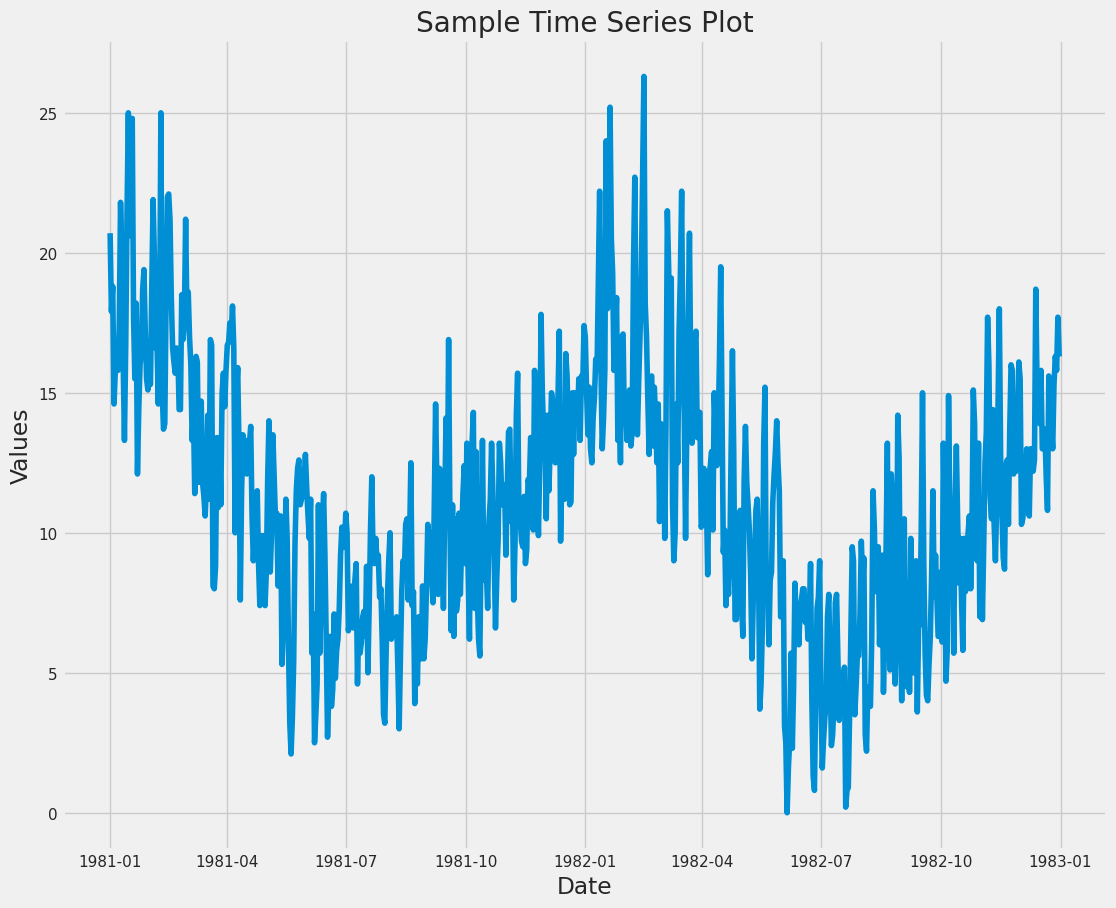

In [18]:
plt.style.use("fivethirtyeight")

# setting figure size to 12, 10
plt.figure(figsize=(12, 10))

# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Sample Time Series Plot")


plt.plot(df_temp.Temp)

In [19]:
data = df_temp.loc['1982-10-01':]

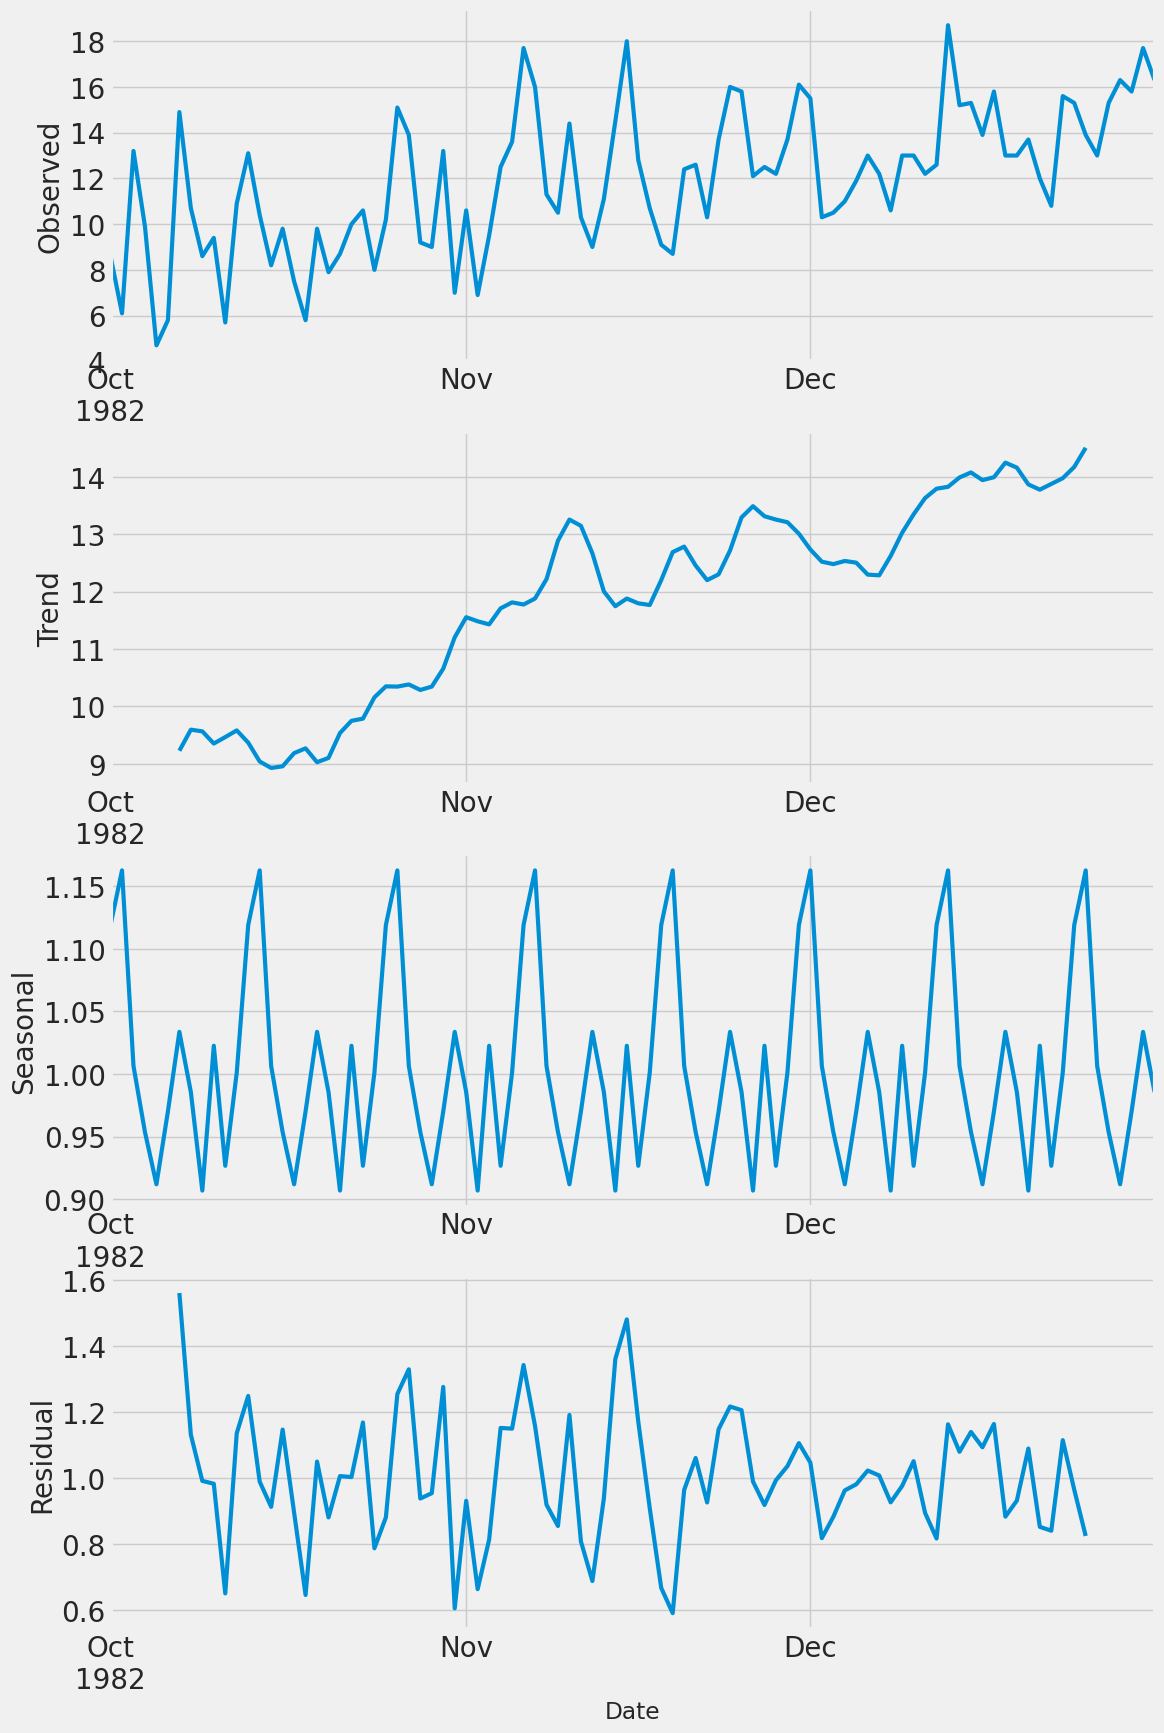

In [21]:
!pip install statsmodels --upgrade

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_decompose(decompose_result):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,20))
    decompose_result.observed.plot(legend=False,ax=ax1,fontsize = 20,grid=True,linewidth = 3)
    ax1.set_ylabel("Observed",fontsize = 20)
    decompose_result.trend.plot(legend=False,ax=ax2,fontsize = 20,grid=True,linewidth = 3)
    ax2.set_ylabel("Trend",fontsize = 20)
    decompose_result.seasonal.plot(legend=False,ax=ax3,fontsize = 20,grid=True,linewidth = 3)
    ax3.set_ylabel("Seasonal",fontsize = 20)
    decompose_result.resid.plot(legend=False,ax=ax4,fontsize = 20,grid=True,linewidth = 3)
    ax4.set_ylabel("Residual",fontsize = 20)


mult_decomposition = seasonal_decompose(data['Temp'], model='multiplicative', period=12)

plot_decompose(mult_decomposition)

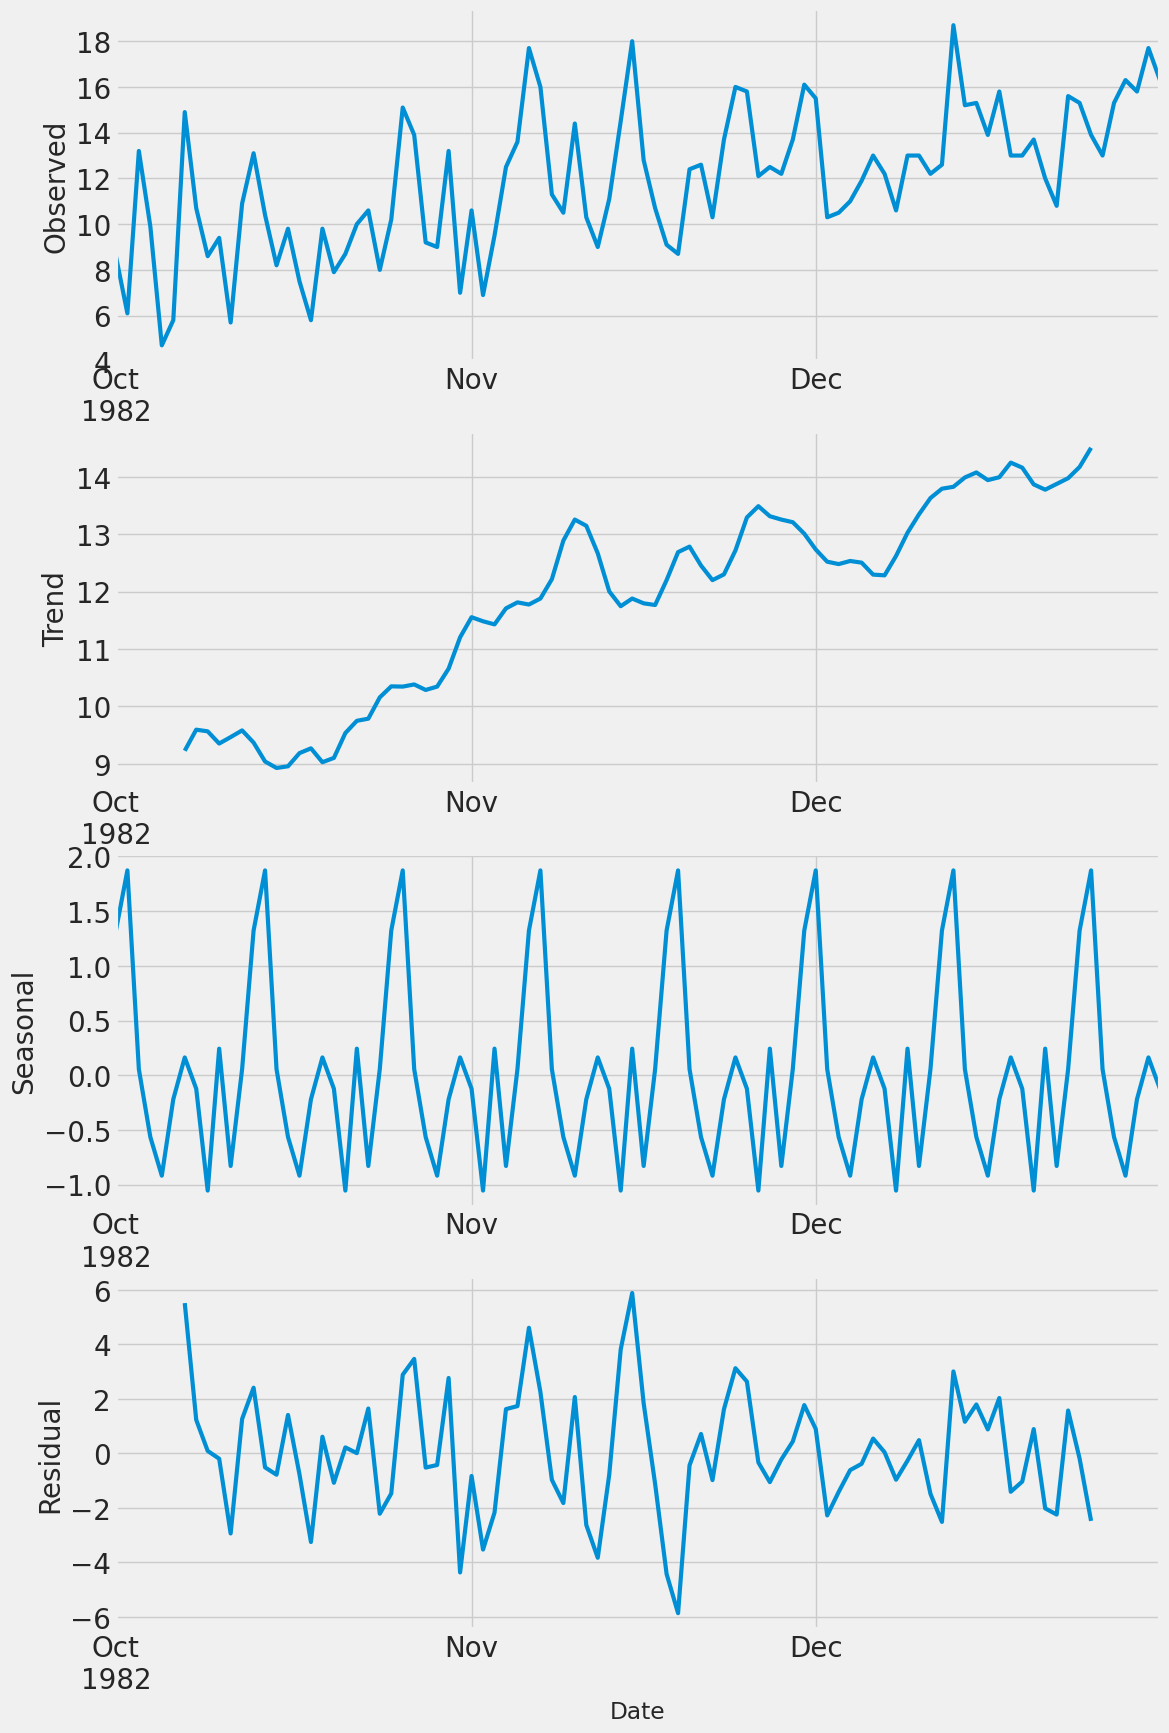

In [23]:
add_decomposition = seasonal_decompose(data['Temp'], model='additive', period=12)
plot_decompose(add_decomposition)

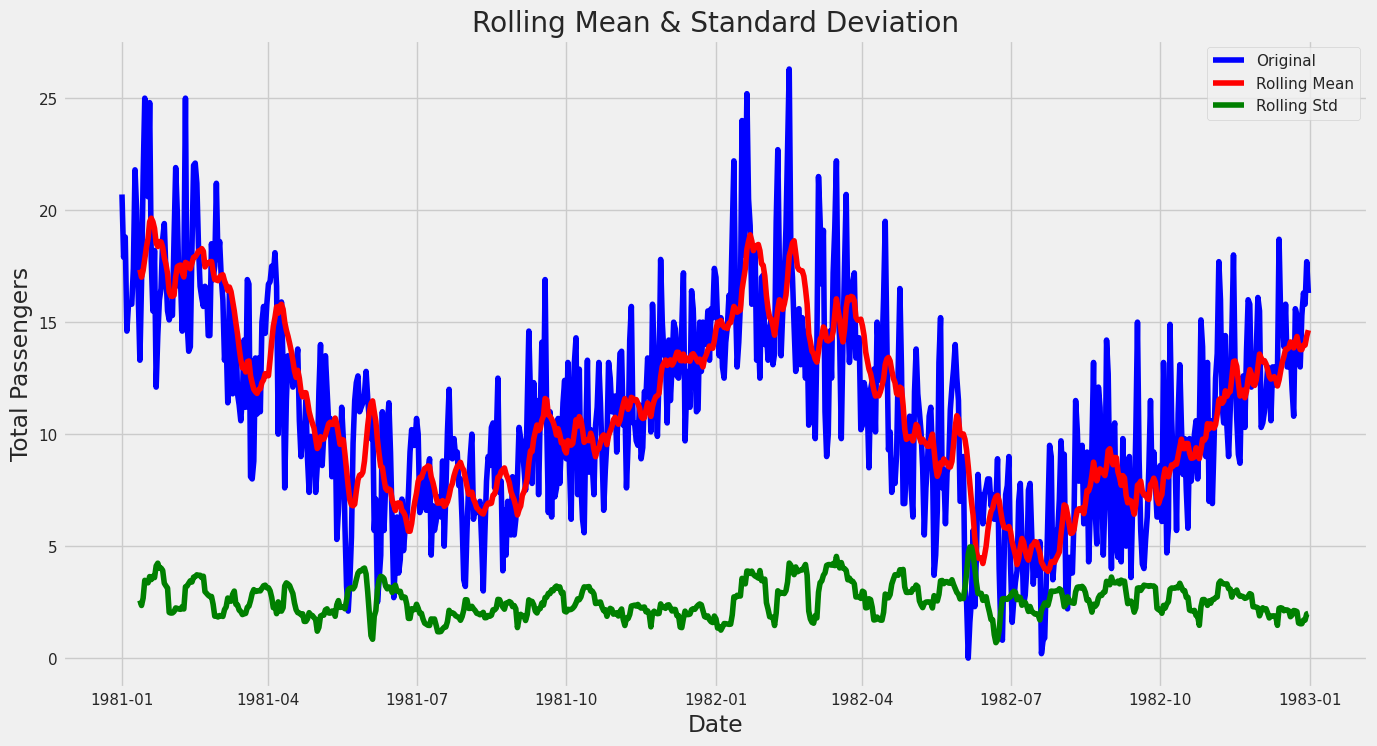

In [24]:
def rolling_stats(series):
    #Determine rolling statistics
    rolmean = series.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level

    rolstd = series.rolling(window=12).std()

    #Plot rolling statistics
    orig = plt.plot(series, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.ylabel('Total Passengers')
    plt.xlabel('Date')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

rolling_stats(df_temp["Temp"])

In [25]:
# Stability Test (Dickey-Fuller Test)
def adfTest(y):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(y)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

adfTest(df_temp["Temp"])

Results of Dickey-Fuller Test:
Test Statistic                  -2.106925
p-value                          0.241739
#Lags Used                      18.000000
Number of Observations Used    711.000000
Critical Value (1%)             -3.439581
Critical Value (5%)             -2.865614
Critical Value (10%)            -2.568939
dtype: float64


In [26]:
def is_stationary(series):
    rolling_stats(series)
    adfTest(series)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

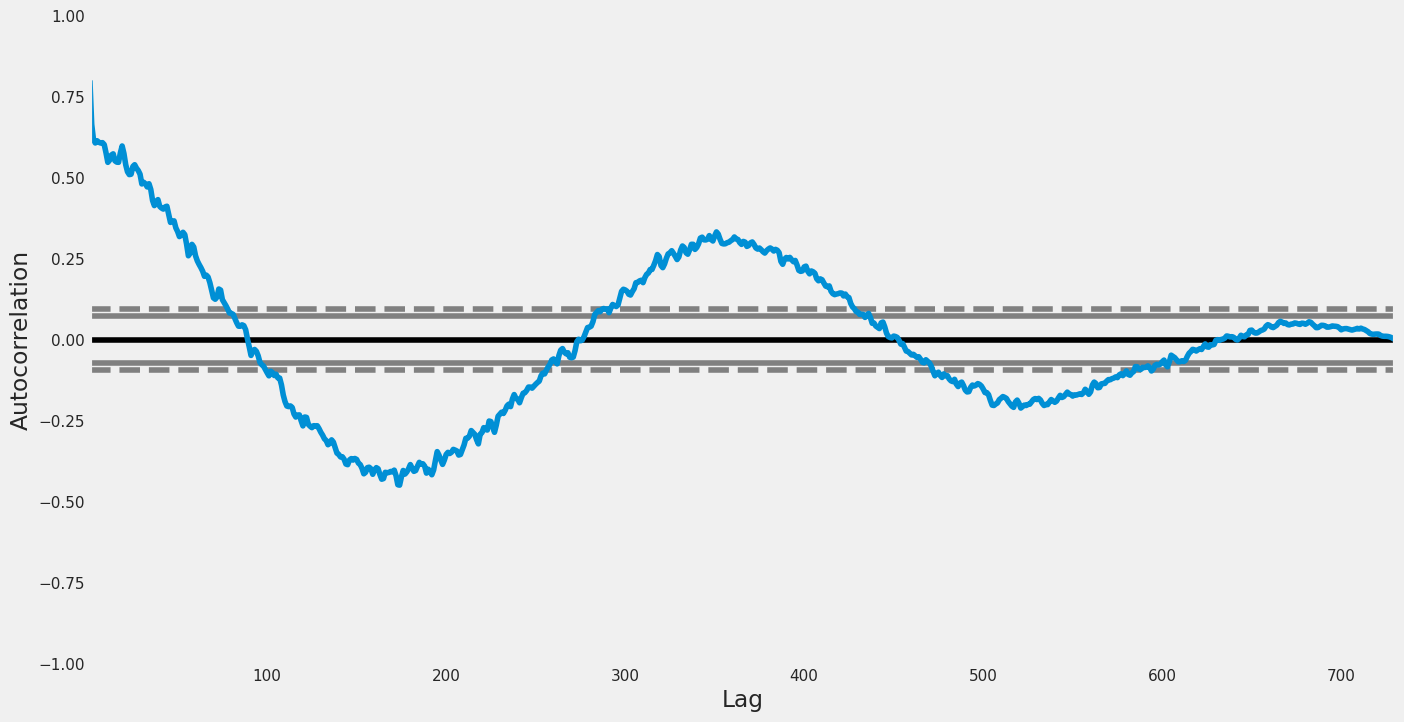

In [27]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_temp["Temp"].tolist())

In [28]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_temp["Temp"], nlags=10)
lag_pacf = pacf(df_temp["Temp"], nlags=10, method='ols')

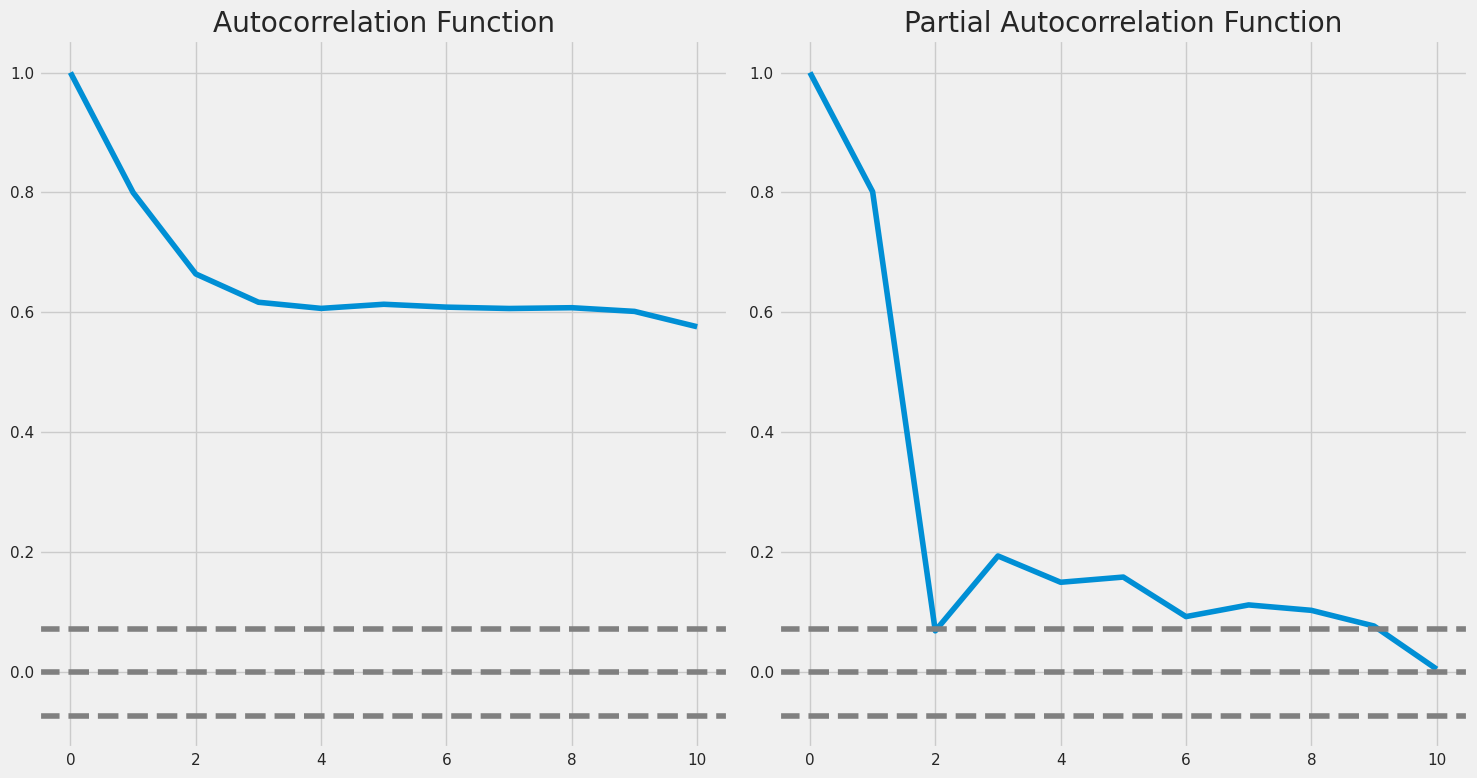

In [29]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(df_temp["Temp"])), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df_temp["Temp"])), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(df_temp["Temp"])), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df_temp["Temp"])), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

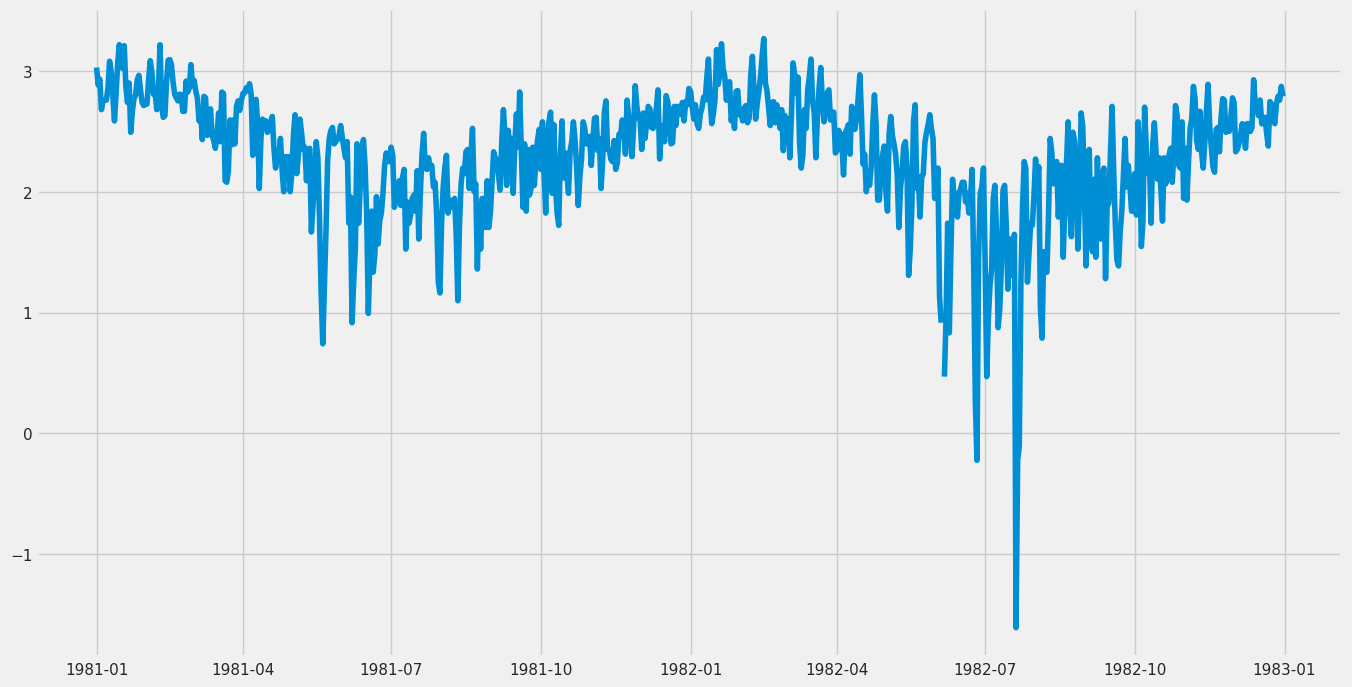

In [30]:
ts_log = np.log(df_temp["Temp"])
plt.plot(ts_log)

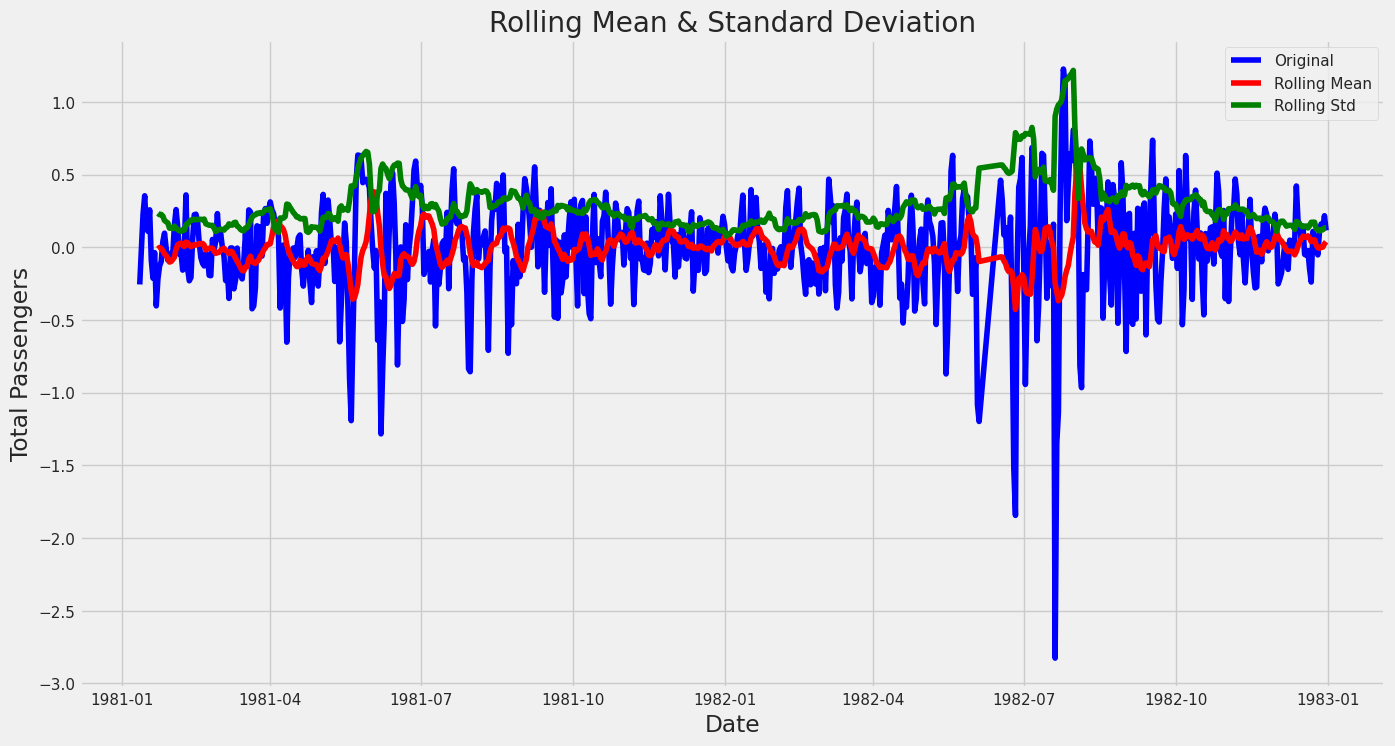

Results of Dickey-Fuller Test:
Test Statistic                -7.394397e+00
p-value                        7.847242e-11
#Lags Used                     2.000000e+01
Number of Observations Used    6.860000e+02
Critical Value (1%)           -3.439918e+00
Critical Value (5%)           -2.865762e+00
Critical Value (10%)          -2.569019e+00
dtype: float64


In [31]:
detrended = ts_log - ts_log.rolling(12).mean()
detrended.dropna(inplace=True)
is_stationary(detrended)

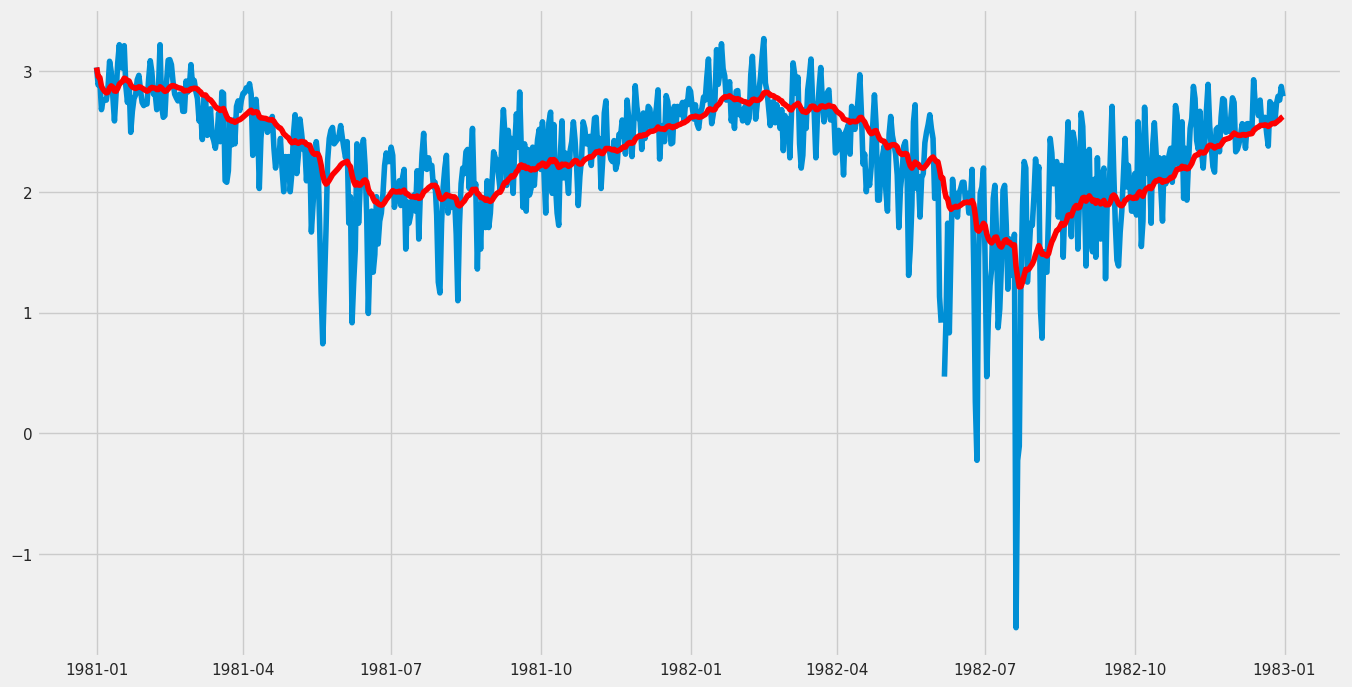

In [32]:
exp_weighted_avg = ts_log.ewm(halflife = 12).mean()
plt.plot(ts_log)
plt.plot(exp_weighted_avg, color = 'red')

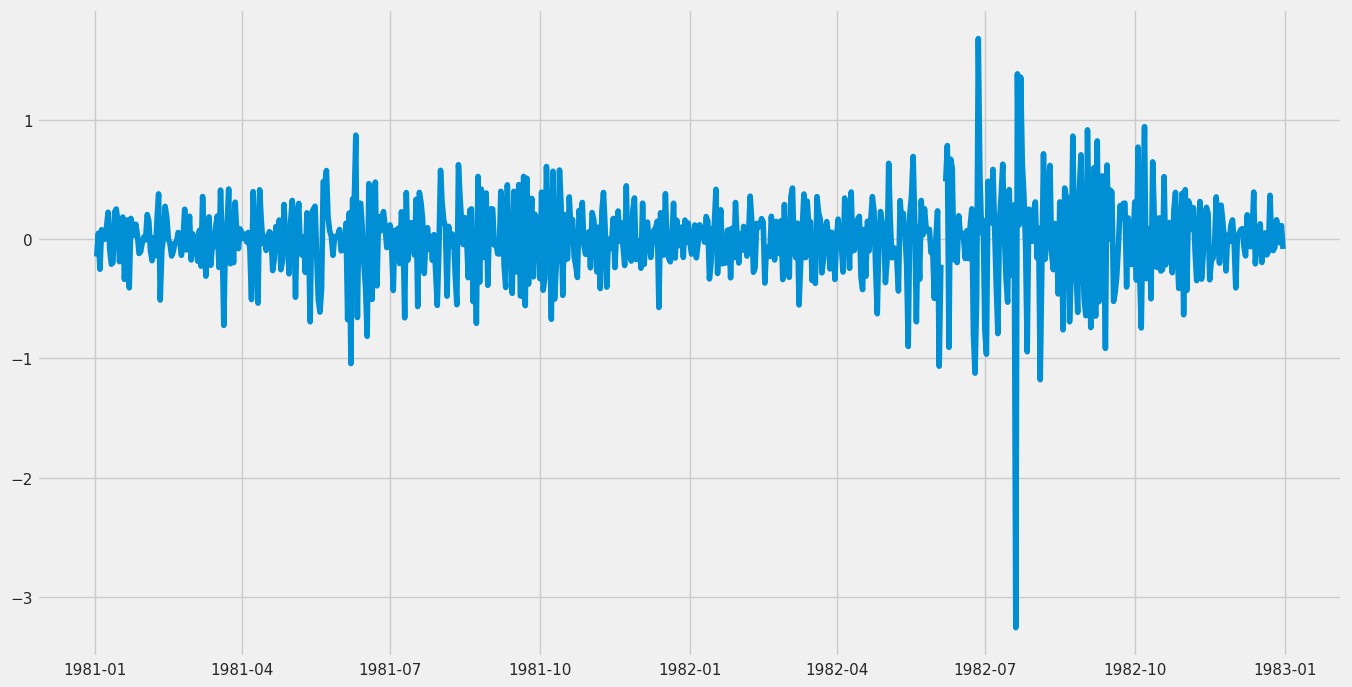

In [33]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [34]:
df_temp.shape

(730, 1)

In [35]:
train = df_temp[:600]
test = df_temp[600:]

In [36]:
def plot_prediction(y_pred, label):
    train["Temp"].plot(legend=True, label="TRAIN")
    test["Temp"].plot(legend=True, label="TEST")
    y_pred.plot(legend=True, label="PREDICTION")
    plt.title("Train and Test Using "+label)
    plt.show()

alpha: 0.01 mae: 3.3876
alpha: 0.11 mae: 4.0146
alpha: 0.21 mae: 3.9023
alpha: 0.31 mae: 4.0078
alpha: 0.41 mae: 4.1901
alpha: 0.51 mae: 4.4243
alpha: 0.61 mae: 4.7062
alpha: 0.71 mae: 5.0123
alpha: 0.81 mae: 5.3133
alpha: 0.91 mae: 5.5692
best_alpha: 0.01 best_mae: 3.3876


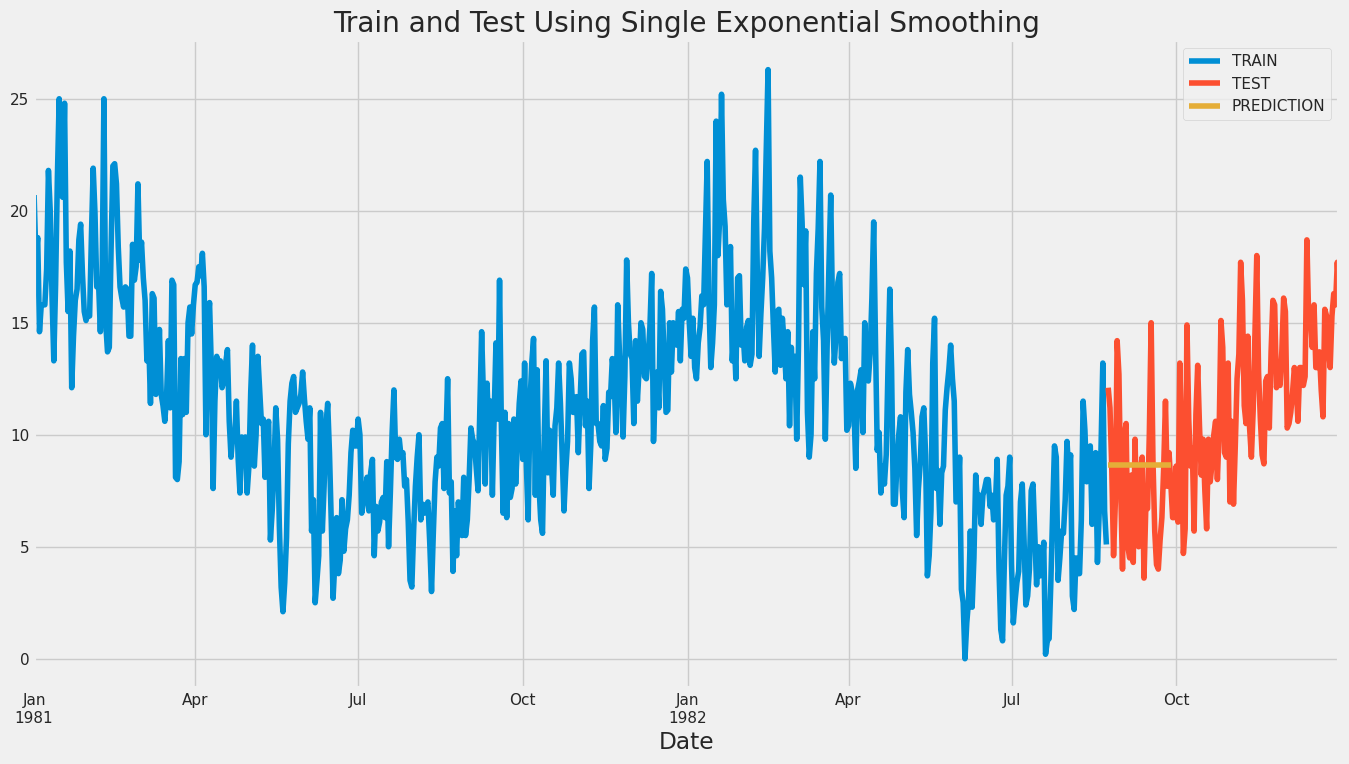

In [37]:
# Single Exponential Smoothing

def ses_optimizer(train, alphas, step=48):
    best_alpha, best_mae = None, float("inf")
    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_mae = alpha, mae
        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae

alphas = np.arange(0.01, 1, 0.10)
best_alpha, best_mae = ses_optimizer(train, alphas, step=130)

ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(36)

plot_prediction(y_pred, "Single Exponential Smoothing")

alpha: 0.01 beta: 0.01 mae: 5.2138
alpha: 0.01 beta: 0.11 mae: 2.7847
alpha: 0.01 beta: 0.21 mae: 2.8765
alpha: 0.01 beta: 0.31 mae: 11.0077
alpha: 0.01 beta: 0.41 mae: 11.902
alpha: 0.01 beta: 0.51 mae: 11.765
alpha: 0.01 beta: 0.61 mae: 15.6833
alpha: 0.01 beta: 0.71 mae: 17.6573
alpha: 0.01 beta: 0.81 mae: 24.0871
alpha: 0.01 beta: 0.91 mae: 11.795
alpha: 0.11 beta: 0.01 mae: 4.8314
alpha: 0.11 beta: 0.11 mae: 5.8808
alpha: 0.11 beta: 0.21 mae: 2.4418
alpha: 0.11 beta: 0.31 mae: 3.3353
alpha: 0.11 beta: 0.41 mae: 4.0838
alpha: 0.11 beta: 0.51 mae: 6.4946
alpha: 0.11 beta: 0.61 mae: 6.3552
alpha: 0.11 beta: 0.71 mae: 11.8693
alpha: 0.11 beta: 0.81 mae: 31.643
alpha: 0.11 beta: 0.91 mae: 54.042
alpha: 0.21 beta: 0.01 mae: 4.4555
alpha: 0.21 beta: 0.11 mae: 2.3936
alpha: 0.21 beta: 0.21 mae: 5.4031
alpha: 0.21 beta: 0.31 mae: 11.4801
alpha: 0.21 beta: 0.41 mae: 20.7875
alpha: 0.21 beta: 0.51 mae: 30.4046
alpha: 0.21 beta: 0.61 mae: 32.8609
alpha: 0.21 beta: 0.71 mae: 24.9824
alpha: 0.2

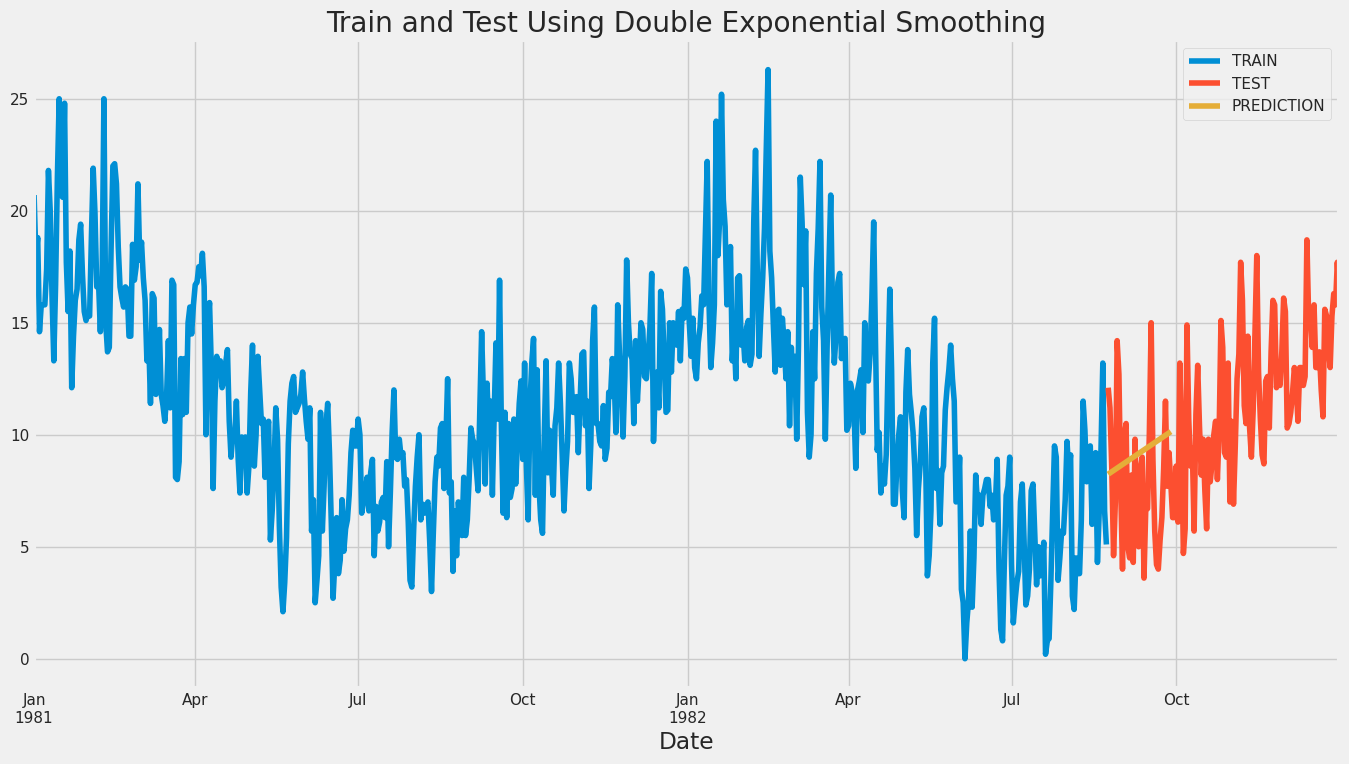

In [38]:
# Double Exponential Smoothing

def des_optimizer(train, alphas, betas, step=48):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae


alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas, step=130)
#54.10

des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha,
                                                         smoothing_slope=best_beta)
y_pred = des_model.forecast(36)

plot_prediction(y_pred, "Double Exponential Smoothing")

[0.1, 0.1, 0.1, 5.08]
[0.1, 0.1, 0.3, 4.36]
[0.1, 0.1, 0.5, 3.83]
[0.1, 0.1, 0.7, 3.52]
[0.1, 0.1, 0.9, 3.61]
[0.1, 0.3, 0.1, 5.21]
[0.1, 0.3, 0.3, 4.45]
[0.1, 0.3, 0.5, 4.08]
[0.1, 0.3, 0.7, 3.36]
[0.1, 0.3, 0.9, 3.31]
[0.1, 0.5, 0.1, 10.35]
[0.1, 0.5, 0.3, 9.27]
[0.1, 0.5, 0.5, 9.62]
[0.1, 0.5, 0.7, 17.5]
[0.1, 0.5, 0.9, 45.42]
[0.1, 0.7, 0.1, 14.29]
[0.1, 0.7, 0.3, 31.31]
[0.1, 0.7, 0.5, 57.45]
[0.1, 0.7, 0.7, 58.8]
[0.1, 0.7, 0.9, 63.68]
[0.1, 0.9, 0.1, 62.77]
[0.1, 0.9, 0.3, 91.76]
[0.1, 0.9, 0.5, 67.52]
[0.1, 0.9, 0.7, 4.62]
[0.1, 0.9, 0.9, 1.4441135364881019e+23]
[0.3, 0.1, 0.1, 5.89]
[0.3, 0.1, 0.3, 7.97]
[0.3, 0.1, 0.5, 10.55]
[0.3, 0.1, 0.7, 17.71]
[0.3, 0.1, 0.9, 31.12]
[0.3, 0.3, 0.1, 31.31]
[0.3, 0.3, 0.3, 32.57]
[0.3, 0.3, 0.5, 44.98]
[0.3, 0.3, 0.7, 47.28]
[0.3, 0.3, 0.9, 109.18]
[0.3, 0.5, 0.1, 42.99]
[0.3, 0.5, 0.3, 10.18]
[0.3, 0.5, 0.5, 33.63]
[0.3, 0.5, 0.7, 29101.4]
[0.3, 0.5, 0.9, 1.0897347150962112e+17]
[0.3, 0.7, 0.1, 22.62]
[0.3, 0.7, 0.3, 54.71]
[0.3, 0.7, 0.5

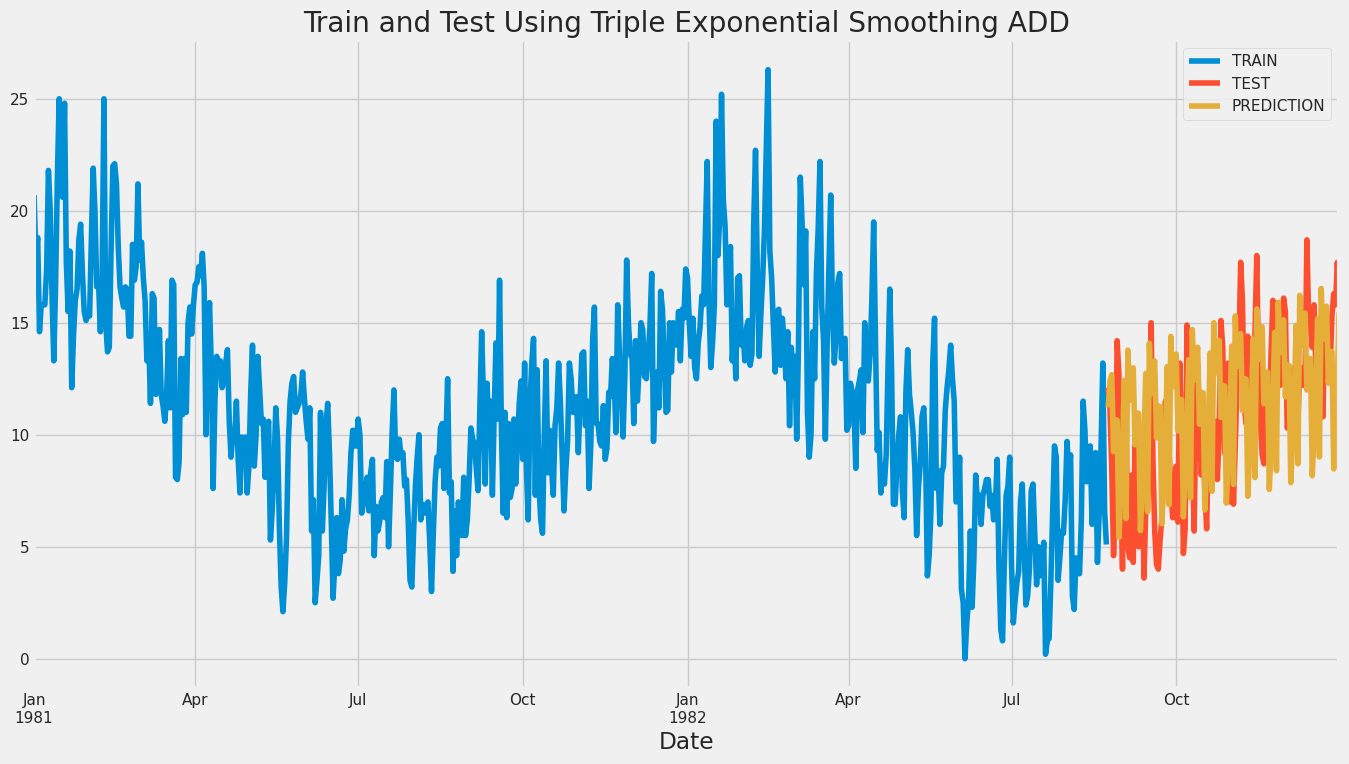

In [39]:
# Triple Exponential Smoothing (Holt-Winters)
import itertools

def tes_optimizer(train, abg, step=48):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

alphas = betas = gammas = np.arange(0.10, 1, 0.20)
abg = list(itertools.product(alphas, betas, gammas))

best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg, step=130)

tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

y_pred = tes_model.forecast(130)

plot_prediction(y_pred, "Triple Exponential Smoothing ADD")

ARIMA(0, 0, 0) AIC=3582.55
ARIMA(0, 0, 1) AIC=3191.65
ARIMA(0, 0, 2) AIC=3063.62
ARIMA(0, 0, 3) AIC=2997.89
ARIMA(0, 1, 0) AIC=2941.19
ARIMA(0, 1, 1) AIC=2913.87
ARIMA(0, 1, 2) AIC=2830.59
ARIMA(0, 1, 3) AIC=2818.69
ARIMA(0, 2, 0) AIC=3436.53
ARIMA(0, 2, 1) AIC=2945.63
ARIMA(0, 2, 2) AIC=2919.18
ARIMA(0, 2, 3) AIC=2837.79
ARIMA(0, 3, 0) AIC=4081.35
ARIMA(0, 3, 1) AIC=3440.18
ARIMA(0, 3, 2) AIC=2956.83
ARIMA(0, 3, 3) AIC=2931.81
ARIMA(1, 0, 0) AIC=2898.35
ARIMA(1, 0, 1) AIC=2894.70
ARIMA(1, 0, 2) AIC=2838.75
ARIMA(1, 0, 3) AIC=2827.42
ARIMA(1, 1, 0) AIC=2928.93
ARIMA(1, 1, 1) AIC=2823.20
ARIMA(1, 1, 2) AIC=2818.05
ARIMA(1, 1, 3) AIC=2819.37
ARIMA(1, 2, 0) AIC=3276.95
ARIMA(1, 2, 1) AIC=2933.67
ARIMA(1, 2, 2) AIC=2949.62
ARIMA(1, 2, 3) AIC=2815.20
ARIMA(1, 3, 0) AIC=3759.23
ARIMA(1, 3, 1) AIC=3281.66
ARIMA(1, 3, 2) AIC=2945.40
ARIMA(1, 3, 3) AIC=2960.80
ARIMA(2, 0, 0) AIC=2897.10
ARIMA(2, 0, 1) AIC=2832.11
ARIMA(2, 0, 2) AIC=2826.89
ARIMA(2, 0, 3) AIC=2828.21
ARIMA(2, 1, 0) AIC=2902.38
A

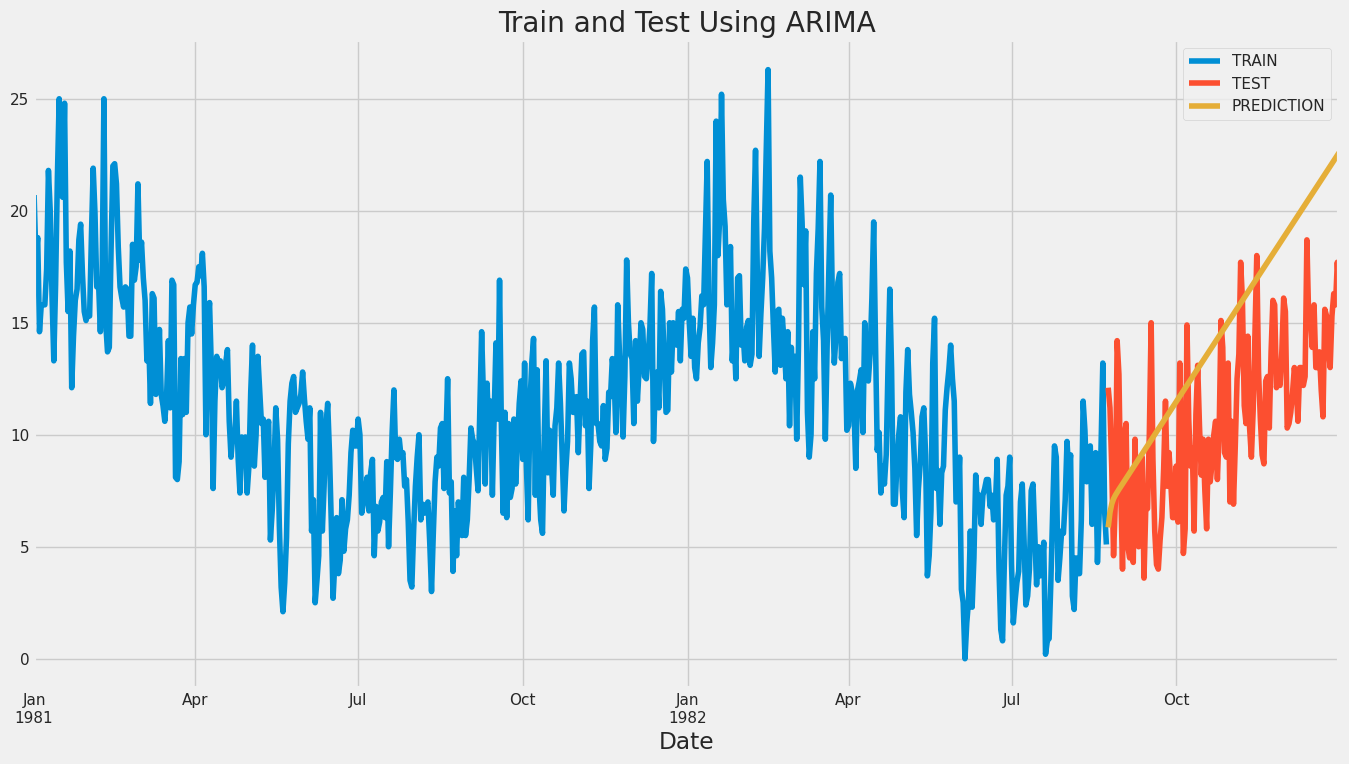

In [45]:
import itertools

p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

def arima_optimizer_aic(train, orders):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            # Use statsmodels.tsa.arima.model.ARIMA instead of statsmodels.tsa.arima_model.ARIMA
            from statsmodels.tsa.arima.model import ARIMA
            # Remove disp=0 from the fit method
            arma_model_result = ARIMA(train, order=order).fit()  # Specify order= when calling ARIMA
            aic = arma_model_result.aic
            if aic < best_aic:
                best_aic, best_params = aic, order
            print('ARIMA%s AIC=%.2f' % (order, aic))
        except:
            continue

    # Check if best_params is still None
    if best_params is None:
        print("No suitable ARIMA model found. Check your data and pdq range.")
        return (0, 0, 0)  # Return a default order to avoid the error
    else:
        print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
        return best_params

best_params_aic = arima_optimizer_aic(train, pdq)

# Tuned Model
from statsmodels.tsa.arima.model import ARIMA  # Import the correct ARIMA class here as well
# Remove disp=0 from the fit method
arima_model = ARIMA(train, order=best_params_aic).fit()  # Specify order= when calling ARIMA
# You were missing the assignment to y_pred
y_pred = arima_model.predict(start=test.index[0], end=test.index[-1])
mean_absolute_error(test, y_pred)

plot_prediction(pd.Series(y_pred, index=test.index), "ARIMA")